In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('./data/usd_inr.csv')
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [75]:
# remove any NaN or other values
df = df.dropna()

# remove values in Y where there is a .
df = df[df['y'] != '.']
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [76]:
m = Prophet()
m.fit(df)

from prophet.serialize import model_to_json, model_from_json
with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

15:55:50 - cmdstanpy - INFO - Chain [1] start processing
15:55:54 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
13296,2025-08-05
13297,2025-08-06
13298,2025-08-07
13299,2025-08-08
13300,2025-08-09


In [78]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13296,2025-08-05,85.052984,83.068725,87.225627
13297,2025-08-06,85.060538,83.012846,87.113271
13298,2025-08-07,85.071385,82.973655,87.236529
13299,2025-08-08,85.083671,82.907359,87.152173
13300,2025-08-09,85.398823,83.427426,87.604066


/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



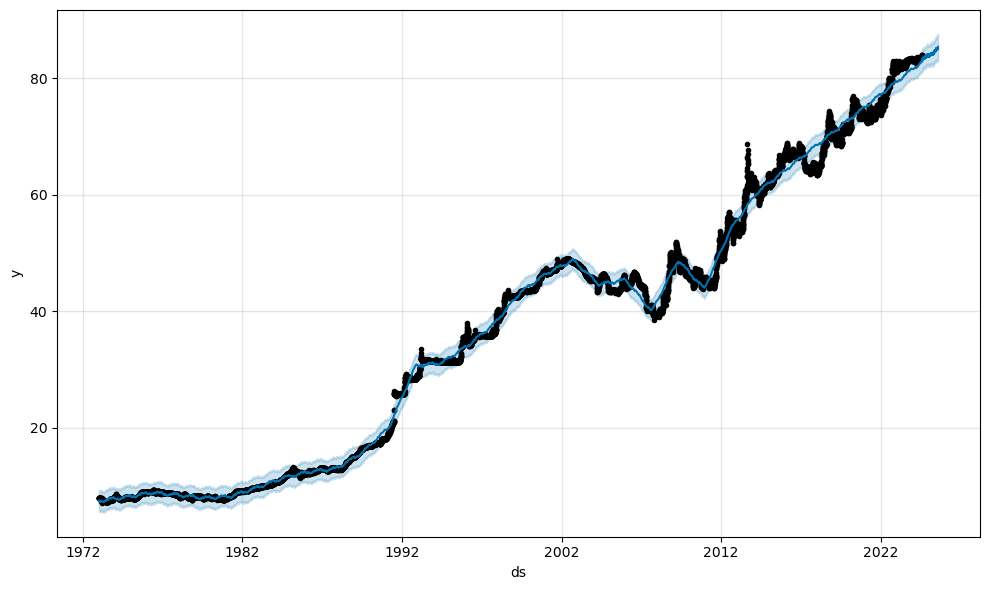

In [79]:
fig1 = m.plot(forecast)

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



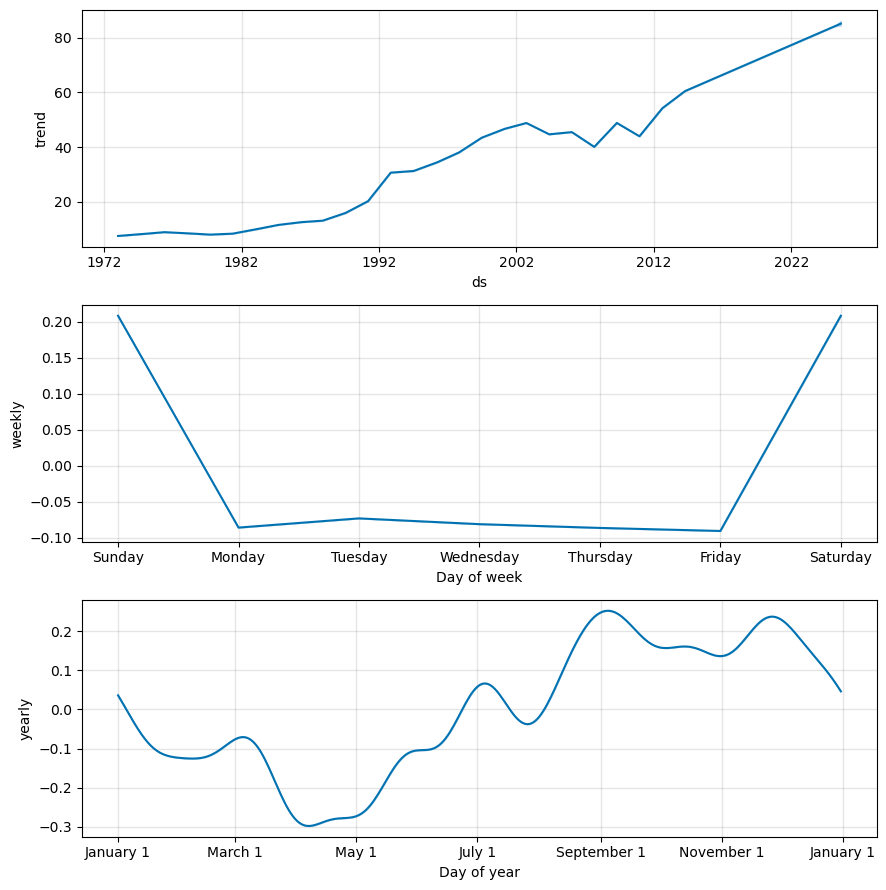

In [80]:

fig2 = m.plot_components(forecast)

In [81]:
from prophet.plot import plot_plotly
import plotly.graph_objs as go
print(go)

plot_plotly(m, forecast)

<module 'plotly.graph_objs' from '/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/plotly/graph_objs/__init__.py'>


In [82]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fcst

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.583141,8.5,5.750941,9.188423,7.583141,7.583141,-0.045268,-0.045268,-0.045268,-0.072916,-0.072916,-0.072916,0.027648,0.027648,0.027648,0.0,0.0,0.0,7.537873
1,1973-01-03,7.584193,8.5,5.670606,9.255239,7.584193,7.584193,-0.061874,-0.061874,-0.061874,-0.080909,-0.080909,-0.080909,0.019035,0.019035,0.019035,0.0,0.0,0.0,7.522319
2,1973-01-04,7.585244,8.5,5.809181,9.187075,7.585244,7.585244,-0.075829,-0.075829,-0.075829,-0.086131,-0.086131,-0.086131,0.010302,0.010302,0.010302,0.0,0.0,0.0,7.509416
3,1973-01-05,7.586296,8.5,5.915269,9.190587,7.586296,7.586296,-0.088845,-0.088845,-0.088845,-0.090342,-0.090342,-0.090342,0.001497,0.001497,0.001497,0.0,0.0,0.0,7.497451
4,1973-01-08,7.589451,8.5,5.594327,9.068654,7.589451,7.589451,-0.110461,-0.110461,-0.110461,-0.085653,-0.085653,-0.085653,-0.024808,-0.024808,-0.024808,0.0,0.0,0.0,7.478990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,2029-08-05,93.806670,8.5,76.188190,108.998501,75.648934,108.264092,0.220203,0.220203,0.220203,0.207976,0.207976,0.207976,0.012227,0.012227,0.012227,0.0,0.0,0.0,94.026873
14758,2029-08-06,93.812620,8.5,75.293293,108.381427,75.637983,108.282658,-0.063829,-0.063829,-0.063829,-0.085653,-0.085653,-0.085653,0.021824,0.021824,0.021824,0.0,0.0,0.0,93.748791
14759,2029-08-07,93.818570,8.5,75.071104,108.704885,75.619426,108.301224,-0.040974,-0.040974,-0.040974,-0.072916,-0.072916,-0.072916,0.031942,0.031942,0.031942,0.0,0.0,0.0,93.777596
14760,2029-08-08,93.824520,8.5,75.438797,109.479145,75.600868,108.319790,-0.038420,-0.038420,-0.038420,-0.080909,-0.080909,-0.080909,0.042489,0.042489,0.042489,0.0,0.0,0.0,93.786100


<class 'matplotlib.figure.Figure'>


/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/envs/skbio-dev/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



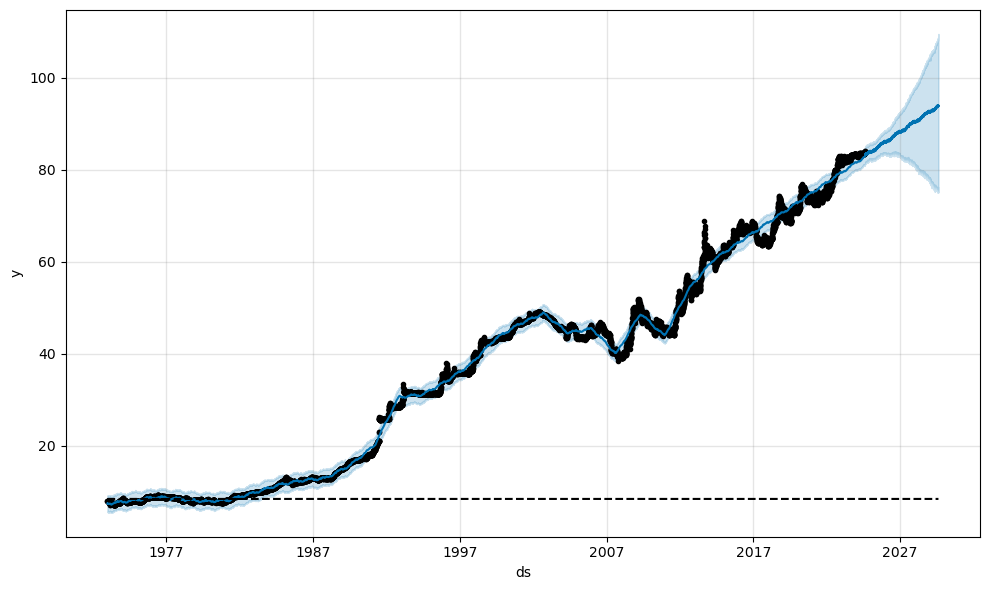

In [83]:
fig = m.plot(fcst)
print(type(fig))

In [84]:
# get yhat from fcst where ds is between 2024-08-10 and 2024-08-30
from math import floor

start = '2024-08-01'
end = '2024-10-30'

fy2024 = fcst[(fcst['ds'] > start) & (fcst['ds'] < end)][['ds', 'yhat']]

# get lowest in fy2024 along with date
low = fy2024[fy2024['yhat'] == fy2024['yhat'].min()]

# get max in fy2024 along with date
high = fy2024[fy2024['yhat'] == fy2024['yhat'].max()]

print(low)
print(high)

low_p = floor(list(low["yhat"])[0])
high_p = list(high["yhat"])[0]

amt = 10
print("Current Amount (USD): ", amt)

print(f"Amount on {str(low['ds'].values[0])[:10]}: INR", amt*low_p)
print("Saving: INR", (amt*high_p - amt*low_p))

print(((high_p-low_p)/low_p)*100)

              ds       yhat
12930 2024-08-02  82.822984
              ds       yhat
13014 2024-10-27  83.783699
Current Amount (USD):  10
Amount on 2024-08-02: INR 820
Saving: INR 17.83699166710653
2.175242886232497


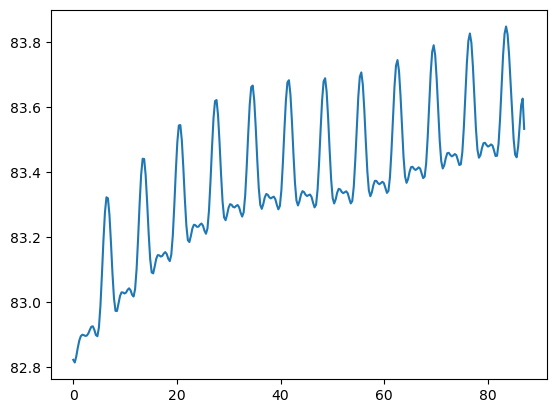

In [85]:
# plot a figure with only data from start to end
rel = (fcst[(fcst['ds'] > start) & (fcst['ds'] < end)])

prices = rel['yhat']
dates = rel['ds']

from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(0, len(prices), 300)
spl = make_interp_spline(range(len(prices)), prices, k=5)
y_smooth = spl(xnew)
plt.plot(xnew, y_smooth)
plt.savefig('rel.png')